Import Library yang dibutuhkan

In [1]:

import pandas as pd
import numpy as np

from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import CountVectorizer
import nltk
nltk.download('stopwords')
from sklearn.feature_extraction import text
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer




d:\anaconda\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
[nltk_data] Downloading package stopwords to C:\Users\a c e
[nltk_data]     r\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Import data yang digunakan

In [2]:
pd.set_option('display.max_columns', 100)
df = pd.read_csv("imdb_top_1000.csv",index_col=False)


Ekstraksi fitur yang akan digunakan

In [3]:
df = df[['Series_Title', 'Overview', 'Genre', 'Director','Star1' ,'Star2' ,'Star3' ,'Star4']]
df["Actor"] = df['Star1'].str.cat(df[["Star2", "Star3", "Star4"]].copy(), sep=" ")
df.drop(['Star1', 'Star2', 'Star3', 'Star4'], inplace=True, axis=1)
df["Director"].str.replace(' ', '')
df.head()


,Series_Title,Overview,Genre,Director,Actor
0,The Shawshank Redemption,Two imprisoned men bond over a number of years...,Drama,Frank Darabont,Tim Robbins Morgan Freeman Bob Gunton William ...
1,The Godfather,An organized crime dynasty's aging patriarch t...,"Crime, Drama",Francis Ford Coppola,Marlon Brando Al Pacino James Caan Diane Keaton
2,The Dark Knight,When the menace known as the Joker wreaks havo...,"Action, Crime, Drama",Christopher Nolan,Christian Bale Heath Ledger Aaron Eckhart Mich...
3,The Godfather: Part II,The early life and career of Vito Corleone in ...,"Crime, Drama",Francis Ford Coppola,Al Pacino Robert De Niro Robert Duvall Diane K...
4,12 Angry Men,A jury holdout attempts to prevent a miscarria...,"Crime, Drama",Sidney Lumet,Henry Fonda Lee J. Cobb Martin Balsam John Fie...


data yang akan digunakan

In [4]:
df["Bag_of_Word"] = df['Overview'].str.cat(df[["Overview", "Genre", "Director", "Actor"]].copy(), sep=" ")
df.drop(["Overview", "Genre", "Actor", "Director"], inplace=True, axis=1)
df.head()

,Series_Title,Bag_of_Word
0,The Shawshank Redemption,Two imprisoned men bond over a number of years...
1,The Godfather,An organized crime dynasty's aging patriarch t...
2,The Dark Knight,When the menace known as the Joker wreaks havo...
3,The Godfather: Part II,The early life and career of Vito Corleone in ...
4,12 Angry Men,A jury holdout attempts to prevent a miscarria...


### Data Preprocessing

cleaning

In [5]:
df['Bag_of_Word'] = df['Bag_of_Word'].str.replace(r'[^\w\s]+', '').str.replace('\d+', '')

C:\Users\a c e r\AppData\Local\Temp\ipykernel_18920\340730359.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df['Bag_of_Word'] = df['Bag_of_Word'].str.replace(r'[^\w\s]+', '').str.replace('\d+', '')


Casefolding

In [6]:
df['Bag_of_Word'] = df['Bag_of_Word'].str.lower()

Stopword Removal

In [7]:
stop = stopwords.words('english')
df['Bag_of_Word'] = df['Bag_of_Word'].apply(lambda x: ' '.join([item for item in x.split() if item not in stop]))


Stemming

In [8]:
porter_stemmer = PorterStemmer()
def stem_sentences(sentence):
    tokens = sentence.split()
    stemmed_tokens = [porter_stemmer.stem(token) for token in tokens]
    return ' '.join(stemmed_tokens)

df['Bag_of_Word_stem'] = df['Bag_of_Word'].apply(stem_sentences)

Lematisasi


In [9]:

wordnet_lemmatizer = WordNetLemmatizer()

def lema_wordNet(sentence):

    tokens = sentence.split()
    lema_tokens = [wordnet_lemmatizer.lemmatize(token, pos="v") for token in tokens]
    return ' '.join(lema_tokens)
    
df['Bag_of_Word_lema'] = df['Bag_of_Word'].apply(lema_wordNet)

data siap pakai

In [10]:
df.set_index('Series_Title')
df.head()

,Series_Title,Bag_of_Word,Bag_of_Word_stem,Bag_of_Word_lema
0,The Shawshank Redemption,two imprisoned men bond number years finding s...,two imprison men bond number year find solac e...,two imprison men bond number years find solace...
1,The Godfather,organized crime dynastys aging patriarch trans...,organ crime dynasti age patriarch transfer con...,organize crime dynastys age patriarch transfer...
2,The Dark Knight,menace known joker wreaks havoc chaos people g...,menac known joker wreak havoc chao peopl gotha...,menace know joker wreak havoc chaos people got...
3,The Godfather: Part II,early life career vito corleone new york city ...,earli life career vito corleon new york citi p...,early life career vito corleone new york city ...
4,12 Angry Men,jury holdout attempts prevent miscarriage just...,juri holdout attempt prevent miscarriag justic...,jury holdout attempt prevent miscarriage justi...


### Vektorisasi menggunakan Bag of Word

membangun model vektor dan indeks judul

In [11]:
#membangun matriks trnasformasi stemmer
count = CountVectorizer()
count_matrix = count.fit_transform(df['Bag_of_Word_stem'])


#membangun matriks trnasformasi lematisasi
count2 = CountVectorizer()
count_matrix2 = count2.fit_transform(df['Bag_of_Word_lema'])

#menyimpan indeks untuk judul
indices = pd.Series(df.Series_Title)
indices[:5]

0    The Shawshank Redemption
1               The Godfather
2             The Dark Knight
3      The Godfather: Part II
4                12 Angry Men
Name: Series_Title, dtype: object

Model vektor

In [12]:
print("tess2")

tess2


### Model Cosine Simmilarity

In [13]:
#cosine sim stemmer
cosine_sim = cosine_similarity(count_matrix, count_matrix)
cosine_sim

#cosine sim lema
cosine_sim2 = cosine_similarity(count_matrix2, count_matrix2)
cosine_sim2


array([[1.        , 0.01613113, 0.01335472, ..., 0.01613113, 0.0805823 ,
        0.        ],
       [0.01613113, 1.        , 0.05428753, ..., 0.01639344, 0.01364878,
        0.03381906],
       [0.01335472, 0.05428753, 1.        , ..., 0.01357188, 0.05649808,
        0.0466638 ],
       ...,
       [0.01613113, 0.01639344, 0.01357188, ..., 1.        , 0.05459511,
        0.        ],
       [0.0805823 , 0.01364878, 0.05649808, ..., 0.05459511, 1.        ,
        0.01877128],
       [0.        , 0.03381906, 0.0466638 , ..., 0.        , 0.01877128,
        1.        ]])

Fungsi rekomendasi

In [14]:
def recomend (title, cosine_sim):
    
    result = []
    idx = indices[indices == title].index[0]
    print (idx)
    
    score = pd.Series(cosine_sim[idx]).sort_values(ascending = False)
    top_10 = list(score.iloc[1:6].index)
    result = indices[top_10]
    return result    

percobaan mengambil indeks rekomendasi

In [15]:
result_stem = recomend("The Dark Knight", cosine_sim).index.to_list()
print(result_stem)

result_lema = recomend("The Dark Knight", cosine_sim2).index.to_list()
print(result_lema)

2
[155, 63, 162, 872, 674]
2
[155, 86, 63, 162, 872]


Percobaan mengambil judul index

In [16]:
result = recomend("The Dark Knight", cosine_sim).to_frame().reset_index()
result.drop(["index"], inplace=True, axis=1)
print (result)

result2 = recomend("The Dark Knight", cosine_sim2).to_frame().reset_index()
result2.drop(["index"], inplace=True, axis=1)
print (result2)
print("tess")


2
                    Series_Title
0                  Batman Begins
1          The Dark Knight Rises
2              L.A. Confidential
3  The Day the Earth Stood Still
4            Dip huet seung hung
2
                    Series_Title
0                  Batman Begins
1                      Andhadhun
2          The Dark Knight Rises
3              L.A. Confidential
4  The Day the Earth Stood Still
tess


#### Mencari seluruh hasil rekomendasi (5 teratas)

mencari seluruh rekomendasi judul

In [17]:
Result_of_recomendation = []
for i in df["Series_Title"]:
    result = recomend(i, cosine_sim).index.to_list()
    Result_of_recomendation.append(result)

df["Top 5 stem"] = Result_of_recomendation

Result_of_recomendation = []
for i in df["Series_Title"]:
    result = recomend(i, cosine_sim2).index.to_list()
    Result_of_recomendation.append(result)

df["Top 5 lema"] = Result_of_recomendation

df.head()

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
87
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
277

,Series_Title,Bag_of_Word,Bag_of_Word_stem,Bag_of_Word_lema,Top 5 stem,Top 5 lema
0,The Shawshank Redemption,two imprisoned men bond number years finding s...,two imprison men bond number year find solac e...,two imprison men bond number years find solace...,"[68, 350, 174, 508, 773]","[68, 350, 174, 508, 12]"
1,The Godfather,organized crime dynastys aging patriarch trans...,organ crime dynasti age patriarch transfer con...,organize crime dynastys age patriarch transfer...,"[974, 3, 814, 299, 186]","[974, 3, 814, 299, 186]"
2,The Dark Knight,menace known joker wreaks havoc chaos people g...,menac known joker wreak havoc chao peopl gotha...,menace know joker wreak havoc chaos people got...,"[155, 63, 162, 872, 674]","[155, 86, 63, 162, 872]"
3,The Godfather: Part II,early life career vito corleone new york city ...,earli life career vito corleon new york citi p...,early life career vito corleone new york city ...,"[974, 1, 720, 664, 933]","[974, 1, 664, 933, 87]"
4,12 Angry Men,jury holdout attempts prevent miscarriage just...,juri holdout attempt prevent miscarriag justic...,jury holdout attempt prevent miscarriage justi...,"[457, 849, 450, 317, 304]","[457, 849, 450, 317, 304]"


Mengambil salah satu sampel hasil rekomendasi

In [18]:
def recomend (title, cosine_sim):
    
    result = []
    idx = indices[indices == title].index[0]
    print (idx)
    
    score = pd.Series(cosine_sim[idx]).sort_values(ascending = False)
    top_10 = list(score.iloc[1:6].index)
    result = indices[top_10]
    return result

In [19]:
df[["Series_Title", "Top 5 stem", "Top 5 lema"]][0:1]

Judul = df["Series_Title"][2]
index_recomend_stem = df["Top 5 stem"][2]
print("Rekomendasi stem untuk film", Judul)
print( indices[index_recomend_stem], "\n")

index_recomend_lema = df["Top 5 lema"][2]
print("Rekomendasi lema untuk film", Judul)
print( indices[index_recomend_stem], "\n")


Rekomendasi stem untuk film The Dark Knight
155                    Batman Begins
63             The Dark Knight Rises
162                L.A. Confidential
872    The Day the Earth Stood Still
674              Dip huet seung hung
Name: Series_Title, dtype: object 

Rekomendasi lema untuk film The Dark Knight
155                    Batman Begins
63             The Dark Knight Rises
162                L.A. Confidential
872    The Day the Earth Stood Still
674              Dip huet seung hung
Name: Series_Title, dtype: object 



Mengambil judul dari rekomendasi sampel

In [20]:
print( indices[index_recomend_stem], "\n")
print( indices[index_recomend_stem], "\n")


155                    Batman Begins
63             The Dark Knight Rises
162                L.A. Confidential
872    The Day the Earth Stood Still
674              Dip huet seung hung
Name: Series_Title, dtype: object 

155                    Batman Begins
63             The Dark Knight Rises
162                L.A. Confidential
872    The Day the Earth Stood Still
674              Dip huet seung hung
Name: Series_Title, dtype: object 



In [21]:
df.to_csv('SiapPakaiFilm2.csv')


### Evaluasi

In [22]:
pd.set_option('display.max_columns', 100)
df2 = pd.read_csv('DataValidator.csv', delimiter=',')

In [23]:
df2['Aktual'] = df2.apply(lambda x: list([x['A1'],x['A2'],x['A3'],x['A4'],x['A5']]),axis=1) 

In [24]:
int_df = pd.merge(df, df2, how='inner', on=['Series_Title'])

In [25]:
int_df['Mae_lema'] = [5 - len(set(a) & set(b)) for a, b in zip(int_df['Top 5 lema'], int_df['Aktual'])]
int_df['Mae_stem'] = [5 - len(set(a) & set(b)) for a, b in zip(int_df['Top 5 stem'], int_df['Aktual'])]

    


In [26]:
df_final = pd.DataFrame().assign(ID=int_df['ID'], Judul=int_df['Series_Title'], R_Stem=int_df['Top 5 stem'],T_Lema=int_df['Top 5 lema'],Aktual=int_df['Aktual'],
                                 MAE_Stem=int_df['Mae_stem'],MAE_Lema=int_df['Mae_lema'])

In [27]:
MAE_stem = df_final["MAE_Stem"].mean()
MAE_lema = df_final["MAE_Lema"].mean()

print ("nilai error stem : " , MAE_stem)
print ("nilai error lema : " , MAE_lema)

print ("\ndengan demikian maka hasil rekomendasi terbaik diperoleh\ndengan menggunakan preprosesing data melalui metode stemmer")



nilai error stem :  4.34
nilai error lema :  4.36

dengan demikian maka hasil rekomendasi terbaik diperoleh
dengan menggunakan preprosesing data melalui metode stemmer


### Visualisasi

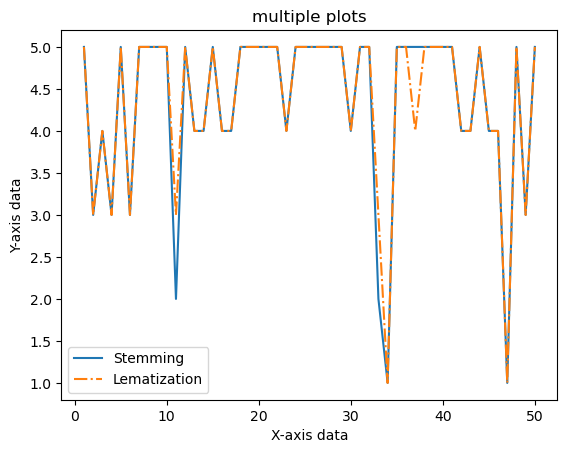

In [28]:
import matplotlib.pyplot as plt
  

y1 = df_final['MAE_Stem']
x =  range(1, 51)
y2 = df_final['MAE_Lema']

plt.plot(x, y1, label ='Stemming')
plt.plot(x, y2, '-.', label ='Lematization')

plt.xlabel("X-axis data")
plt.ylabel("Y-axis data")
plt.legend()
plt.title('multiple plots')
plt.show()



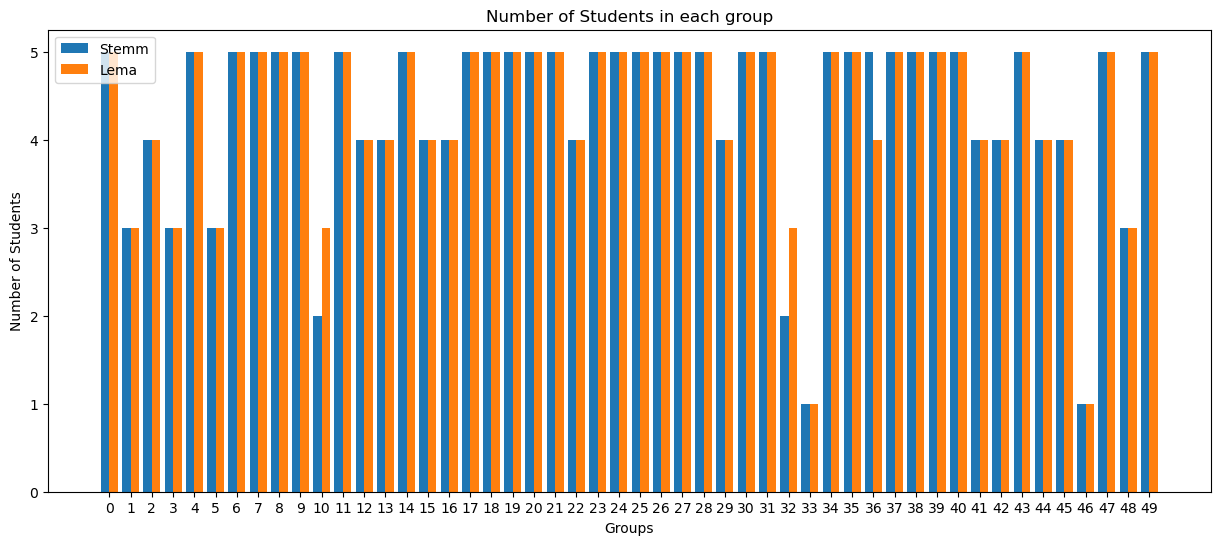

In [29]:
import numpy as np 
import matplotlib.pyplot as plt 
  
from matplotlib.pyplot import figure

figure(figsize=(15, 6), dpi=100)
  
X = range(0, 50)
Ygirls = y1
Zboys = y2
  
X_axis = np.arange(len(X))
  
plt.bar(X_axis - 0.2, Ygirls, 0.4, label = 'Stemm')
plt.bar(X_axis + 0.2, Zboys, 0.4, label = 'Lema')
  
plt.xticks(X_axis, X)
plt.xlabel("Groups")
plt.ylabel("Number of Students")
plt.title("Number of Students in each group")
plt.legend()
plt.show()

In [30]:
print( "Lema indeks 10 - 13 " , cosine_sim2[10][13])  
print( "Stemm indeks 10 - 13 " , cosine_sim[10][13]) 

Lema indeks 10 - 13  0.1359683601356698
Stemm indeks 10 - 13  0.18541140018500424


 The Lord of the Rings: The Fellowship of the Ring


5,226,13,618,169
meek hobbit shire eight companion set journey destroy power one ring save middleearth dark lord sauron meek hobbit shire eight companion set journey destroy power one ring save middleearth dark lord sauron action adventur drama peter jackson elijah wood ian mckellen orlando bloom sean bean

5,226,618,162,267
meek hobbit shire eight companion set journey destroy powerful one ring save middleearth dark lord sauron meek hobbit shire eight companion set journey destroy powerful one ring save middleearth dark lord sauron action adventure drama peter jackson elijah wood ian mckellen orlando bloom sean bean

kata kata yang berbeda :

Stem :
 power , power , adventur 
 adventur

Lema : 
-powerful,  powerful, adventure
 adventure

Aktual
13,5,618,14,3

Stem : error pada 14, 3
Lema : 13, 14, 3

Data ke - 13
The Lord of the Rings: The Two Towers

frodo sam edge closer mordor help shifty gollum divide fellowship make stand saurons new ally saruman hordes isengard frodo sam edge closer mordor help shifty gollum divide fellowship make stand saurons new ally saruman hordes isengard action adventure drama peter jackson elijah wood ian mckellen viggo mortensen orlando bloom

Lema indeks 10 - 13  =   0.1359683601356698
Stemm indeks 10 - 13  = 0.18541140018500424





Udah ada atau belum - > udah ada

Metodenya udah ada atau belum -> Bag of word (belum ? =  Bagaimana tingkat akurasi dari metode normalisasi stemming dan lematisasi pada model rekomendasi menggunakan Cosine sim dan bag of word)

Objek penelitian -> Model rekomendasi 


----

Rumusan masalah 
Bagaiman tingkat akurasi ?

Tujuan penelitian ->
Mengukur tingkat akurasi


